# Setup

In [ ]:
try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False


if IN_COLAB:
    %pip install transformer_lens
    %pip install circuitsvis
    # install a faster Node version
    !curl -fsSL https://deb.nodesource.com/setup_16.x | sudo -E bash -; sudo apt-get install -y nodejs

if not IN_COLAB:
    from IPython import get_ipython
    ip = get_ipython()
    if not ip.extension_manager.loaded:
        ip.extension_manager.load('autoreload')
        %autoreload 2


Running as a Colab notebook
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [ ]:
from functools import partial
from typing import List, Optional, Union

import einops
import numpy as np
import plotly.express as px
import plotly.io as pio
import torch
from circuitsvis.attention import attention_heads
from fancy_einsum import einsum
from IPython.display import HTML, IFrame
from jaxtyping import Float

import transformer_lens.utils as utils
from transformer_lens import ActivationCache, HookedTransformer

In [ ]:
torch.set_grad_enabled(False)
print("Disabled automatic differentiation")

Disabled automatic differentiation


In [ ]:
def imshow(tensor, **kwargs):
    px.imshow(
        utils.to_numpy(tensor),
        color_continuous_midpoint=0.0,
        color_continuous_scale="RdBu",
        **kwargs,
    ).show()


def line(tensor, **kwargs):
    px.line(
        y=utils.to_numpy(tensor),
        **kwargs,
    ).show()


def scatter(x, y, xaxis="", yaxis="", caxis="", **kwargs):
    x = utils.to_numpy(x)
    y = utils.to_numpy(y)
    px.scatter(
        y=y,
        x=x,
        labels={"x": xaxis, "y": yaxis, "color": caxis},
        **kwargs,
    ).show()

In [ ]:
model1 = HookedTransformer.from_pretrained(
    "gpt2-small",
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

model2 = HookedTransformer.from_pretrained(
    "distillgpt2",
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

device: torch.device = utils.get_device()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loaded pretrained model gpt2-small into HookedTransformer


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loaded pretrained model distillgpt2 into HookedTransformer


In [ ]:
prompt = "Van done in 1. Hat done in 2. Ring done in 3. Desk done in 4. Sun done in "
answer = " 5"

utils.test_prompt(prompt, answer, model1, prepend_bos=True)
utils.test_prompt(prompt, answer, model2, prepend_bos=True)

Tokenized prompt: ['<|endoftext|>', 'Van', ' done', ' in', ' 1', '.', ' Hat', ' done', ' in', ' 2', '.', ' Ring', ' done', ' in', ' 3', '.', ' Desk', ' done', ' in', ' 4', '.', ' Sun', ' done', ' in', ' ']
Tokenized answer: [' 5']


Performance on answer token:
Rank: 962      Logit:  4.98 Prob:  0.00% Token: | 5|

Top 0th token. Logit: 14.28 Prob:  9.98% Token: |!!!|
Top 1th token. Logit: 14.26 Prob:  9.84% Token: | |
Top 2th token. Logit: 14.26 Prob:  9.77% Token: |????|
Top 3th token. Logit: 14.10 Prob:  8.33% Token: |________________|
Top 4th token. Logit: 13.47 Prob:  4.43% Token: |________________________________|
Top 5th token. Logit: 13.27 Prob:  3.63% Token: |________|
Top 6th token. Logit: 13.05 Prob:  2.93% Token: |~~|
Top 7th token. Logit: 13.03 Prob:  2.85% Token: |�|
Top 8th token. Logit: 12.93 Prob:  2.59% Token: |【|
Top 9th token. Logit: 12.86 Prob:  2.41% Token: |****************|


Ranks of the answer tokens: [(' 5', 962)]

Tokenized prompt: ['<|endoftext|>', 'Van', ' done', ' in', ' 1', '.', ' Hat', ' done', ' in', ' 2', '.', ' Ring', ' done', ' in', ' 3', '.', ' Desk', ' done', ' in', ' 4', '.', ' Sun', ' done', ' in', ' ']
Tokenized answer: [' 5']


Performance on answer token:
Rank: 5734     Logit:  2.71 Prob:  0.00% Token: | 5|

Top 0th token. Logit: 15.27 Prob: 12.04% Token: |????|
Top 1th token. Logit: 14.73 Prob:  7.02% Token: |________________|
Top 2th token. Logit: 14.36 Prob:  4.84% Token: |!!!|
Top 3th token. Logit: 14.31 Prob:  4.62% Token: |vern|
Top 4th token. Logit: 14.18 Prob:  4.06% Token: | |
Top 5th token. Logit: 14.12 Prob:  3.81% Token: |iced|
Top 6th token. Logit: 14.00 Prob:  3.37% Token: |�|
Top 7th token. Logit: 13.77 Prob:  2.68% Token: |????????|
Top 8th token. Logit: 13.66 Prob:  2.41% Token: |~~|
Top 9th token. Logit: 13.59 Prob:  2.25% Token: |________|


Ranks of the answer tokens: [(' 5', 5734)]

# Store activations

In [ ]:
from transformer_lens.hook_points import HookPoint

def retrieve_mlp_hook(
    value: Float[torch.Tensor, "batch pos d_model"],
    hook: HookPoint,
    activations: list
) -> Float[torch.Tensor, "batch pos d_model"]:
    print(f"Shape of the MLP activations: {value.shape}")
    activations.append(value.detach().cpu().numpy())
    return value

def get_mlp_activations(model, prompt, layer):
  tokens = model.to_tokens(prompt)
  logits, cache = model.run_with_cache(tokens, remove_batch_dim=True)
  activations = []
  mlp_val = model.run_with_hooks(
      tokens,
      fwd_hooks=[(utils.get_act_name("mlp_out", layer), partial(retrieve_mlp_hook, activations=activations))]
  )
  return activations

In [ ]:
teacher_mlp_activations = get_mlp_activations(model1, prompt, 9)
student_mlp_activations = get_mlp_activations(model2, prompt, 4)
student_mlp_activations_alt = get_mlp_activations(model2, prompt, 3)

print(teacher_mlp_activations)
print(student_mlp_activations)

Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
[array([[[-0.01084341, -0.03316607, -0.27578962, ..., -0.01788723,
          0.10779387, -0.08216543],
        [ 0.16866833,  0.93389344,  0.23028472, ..., -0.495066  ,
         -0.33012182, -0.1867921 ],
        [-0.40765914, -1.1266565 ,  0.8368833 , ...,  0.6348066 ,
          1.734946  ,  0.17954627],
        ...,
        [-1.7554098 , -0.23452283, -0.2766893 , ...,  0.6804321 ,
         -0.06864302, -0.98505926],
        [-1.6882051 ,  3.1768687 ,  5.440843  , ...,  2.054364  ,
         -1.5392329 ,  4.100189  ],
        [ 1.4211816 ,  2.1231794 ,  0.21113524, ...,  0.20968235,
         -2.3085377 ,  0.03453791]]], dtype=float32)]
[array([[[-0.3635873 ,  0.37121558,  0.06763178, ..., -0.46097454,
          0.71135694, -0.44949484],
        [-0.23700646,  0.6430335 ,  0.36445552, ..., -0.60306114,
         -1.8862399 , 

In [ ]:
def tokens_to_words(tokens, model):
    return model.tokenizer.decode(tokens[0])

tokens_teacher = model1.to_tokens(prompt)
tokens_student = model2.to_tokens(prompt)

tokens_teacher_words = tokens_to_words(tokens_teacher, model1)
tokens_student_words = tokens_to_words(tokens_student, model2)

In [ ]:
tokens_teacher_words

'<|endoftext|>Van done in 1. Hat done in 2. Ring done in 3. Desk done in 4. Sun done in '

# Analyse activations with PCA

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

prompt = "Van done in 1. Hat done in 2. Ring done in 3. Desk done in 4. Sun done in "

tokens = model1.to_tokens(prompt)
token_ids = tokens.squeeze().tolist()
token_labels = [model1.tokenizer.decode([token_id]) for token_id in token_ids]

teacher_mlp_activations = get_mlp_activations(model1, prompt, 9)
student_mlp_activations = get_mlp_activations(model2, prompt, 4)
student_mlp_activations_alt = get_mlp_activations(model2, prompt, 3)

teacher_np = np.array(teacher_mlp_activations)
student_np = np.array(student_mlp_activations)
student_alt_np = np.array(student_mlp_activations_alt)

pca = PCA(n_components=2)
teacher_pca = pca.fit_transform(teacher_np.reshape(-1, teacher_np.shape[-1]))
student_pca = pca.transform(student_np.reshape(-1, student_np.shape[-1]))
student_pca_alt = pca.transform(student_alt_np.reshape(-1, student_alt_np.shape[-1]))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=teacher_pca[:, 0],
    y=teacher_pca[:, 1],
    mode='markers+text',
    text=[f"{label} ({i})" for i, label in enumerate(token_labels)],
    textposition="top center",
    marker=dict(color='blue', size=8, opacity=0.7),
    name='Teacher'
))

fig.add_trace(go.Scatter(
    x=student_pca[:, 0],
    y=student_pca[:, 1],
    mode='markers+text',
    text=[f"{label} ({i})" for i, label in enumerate(token_labels)],
    textposition="bottom center",
    marker=dict(color='red', size=8, opacity=0.7),
    name='Student'
))

fig.add_trace(go.Scatter(
    x=student_pca_alt[:, 0],
    y=student_pca_alt[:, 1],
    mode='markers+text',
    text=[f"{label} ({i})" for i, label in enumerate(token_labels)],
    textposition="bottom center",
    marker=dict(color='yellow', size=8, opacity=0.7),
    name='Student (alt)'
))

fig.update_layout(
    title="PCA Projection of MLP Activations (Teacher vs. Student)",
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    hovermode="closest",
    template="plotly_white"
)

fig.show()


Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])


# Canonical Correlation Analysis (CCA)

In [ ]:
# showing that MLP9 is most similar to MLP4:
import numpy as np
from sklearn.cross_decomposition import CCA

def calculate_cca_similarity(model1, model2, prompt, layer):
  cca_dict = {}

  mlp_activations = get_mlp_activations(model1, prompt, layer)
  mlp_np = np.array(mlp_activations)
  mlp_pca = pca.fit_transform(mlp_np.reshape(-1, mlp_np.shape[-1]))

  for i in range(6):
    curr_acts = get_mlp_activations(model2, prompt, i)
    curr_np = np.array(curr_acts)
    curr_pca = pca.transform(curr_np.reshape(-1, curr_np.shape[-1]))

    cca = CCA(n_components=1)

    X_A_c, X_B_c = cca.fit_transform(mlp_pca, curr_pca)
    correlations = [np.corrcoef(X_A_c[:, i], X_B_c[:, i])[0, 1] for i in range(cca.n_components)]

    cca_dict[i] = correlations[0]

  return cca_dict

In [ ]:
cca_similarities_7 = calculate_cca_similarity(model1, model2, prompt, 7)
cca_similarities_8 = calculate_cca_similarity(model1, model2, prompt, 8)
cca_similarities_9 = calculate_cca_similarity(model1, model2, prompt, 9)
cca_similarities_10 = calculate_cca_similarity(model1, model2, prompt, 10)
cca_similarities_11 = calculate_cca_similarity(model1, model2, prompt, 11)

print(f"T7: {cca_similarities_7}")
print(f"T8: {cca_similarities_8}")
print(f"T9: {cca_similarities_9}")
print(f"T10: {cca_similarities_10}")
print(f"T11: {cca_similarities_11}")

Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of the MLP activations: torch.Size([1, 25, 768])
Shape of t

# Model sparsity calculation

In [ ]:
teacher_sparsity = np.mean(np.abs(teacher_np) > 0.1)
student_sparsity = np.mean(np.abs(student_np) > 0.1)

print(f"Teacher Sparsity: {teacher_sparsity:.3f}, Student Sparsity: {student_sparsity:.3f}")


Teacher Sparsity: 0.899, Student Sparsity: 0.914


# Use big dataset

In [ ]:
!git clone https://github.com/wlg1/seqcont_circ_expms.git

Cloning into 'seqcont_circ_expms'...
remote: Enumerating objects: 875, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 875 (delta 180), reused 208 (delta 131), pack-reused 611 (from 1)
Receiving objects: 100% (875/875), 19.38 MiB | 17.67 MiB/s, done.
Resolving deltas: 100% (553/553), done.


In [ ]:
import pickle

prompts_list = []

task = "numerals"
prompt_types = ['done', 'lost', 'names']
num_samps_per_ptype = 128

for i in prompt_types:
    file_name = f'/content/seqcont_circ_expms/data/{task}/{task}_prompts_{i}.pkl'
    with open(file_name, 'rb') as file:
        filelist = pickle.load(file)

    print(filelist[0]['text'])
    prompts_list += filelist [:num_samps_per_ptype]

prompts = [prompt['text'] for prompt in prompts_list]

tokens1 = model1.to_tokens(prompts, prepend_bos=True)
tokens2 = model2.to_tokens(prompts, prepend_bos=True)

original_logits1, local_cache1 = model1.run_with_cache(tokens)
original_logits2, local_cache2 = model2.run_with_cache(tokens)

Van done in 1. Hat done in 2. Ring done in 3. Desk done in 4. Sun done in
Oil lost in 1. Apple lost in 2. Tree lost in 3. Snow lost in 4. Apple lost in
Marcus born in 1. Victoria born in 2. George born in 3. Brandon born in 4. Jamie born in


In [ ]:
print(len(prompts))

384


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

def compare_mlps(teacher_layer, student_layer, display=True):
    teacher_acts = np.array(local_cache1[f'blocks.{teacher_layer}.hook_mlp_out'].cpu())  # (tokens, hidden_dim)
    student_acts = np.array(local_cache2[f'blocks.{student_layer}.hook_mlp_out'].cpu())

    teacher_acts = teacher_acts.squeeze(0)
    student_acts = student_acts.squeeze(0)

    pca = PCA(n_components=2)
    combined_acts = np.vstack([teacher_acts, student_acts])
    pca.fit(combined_acts)

    teacher_pca = pca.transform(teacher_acts)
    student_pca = pca.transform(student_acts)

    num_tokens = min(teacher_acts.shape[0], student_acts.shape[0])

    average_sim_other_tokens = np.mean([
        cosine_similarity(teacher_acts[i].reshape(1, -1), student_acts[i].reshape(1, -1))[0, 0]
        for i in range(1, num_tokens)
    ])
    print(f"Mean cosine similarity of other token activations: {average_sim_other_tokens:.4f}")

    first_token_sim = cosine_similarity(
        teacher_acts[0].reshape(1, -1),
        student_acts[0].reshape(1, -1)
    )[0, 0]
    print(f"Cosine similarity of first token activations: {first_token_sim:.4f}")

    print(teacher_acts.shape)
    print(teacher_acts[0].reshape(1, -1))
    mean_all_tokens = np.mean([
        cosine_similarity(teacher_acts[i].reshape(1, -1), student_acts[i].reshape(1, -1))[0, 0]
        for i in range(num_tokens)
    ])
    print(f"Mean cosine similarity of all token activations: {mean_all_tokens:.4f}")

    if display:
        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=teacher_pca[:, 0],
            y=teacher_pca[:, 1],
            mode='markers+text',
            text=[str(i) for i in range(len(teacher_pca))],
            textposition="top center",
            marker=dict(color='blue', size=8, opacity=0.7),
            name=f'Teacher (MLP{teacher_layer})'
        ))

        fig.add_trace(go.Scatter(
            x=student_pca[:, 0],
            y=student_pca[:, 1],
            mode='markers+text',
            text=[str(i) for i in range(len(student_pca))],
            textposition="top center",
            marker=dict(color='green', size=8, opacity=0.7),
            name=f'Student (MLP{student_layer})'
        ))

        fig.update_layout(
            title="PCA Projection of MLP Activations",
            xaxis_title="PCA Component 1",
            yaxis_title="PCA Component 2",
            font=dict(size=16),
            hovermode="closest",
            template="plotly_white"
        )

        fig.show()
    else:
      return teacher_pca, student_pca


### MLPT7/MLPS3:

In [ ]:
compare_mlps(7, 3)

Mean cosine similarity of other token activations: 0.6158
Cosine similarity of first token activations: 0.9656
(25, 768)
[[-4.65113372e-02  1.46540683e-02 -2.18173802e-01  1.86055452e-02
  -1.68832913e-02 -1.14420041e-01 -9.67293233e-02  8.86262208e-03
   6.86521381e-02 -1.07793957e-02  1.11352935e-01 -7.15303347e-02
  -7.68480450e-02  1.18039995e-02 -1.00894317e-01 -9.46114287e-02
  -1.41894281e-01  1.04599148e-02  5.11103608e-02 -9.87748429e-02
  -1.61765516e-02 -9.76266488e-02 -7.47340769e-02 -1.86997522e-02
  -1.47412553e-01 -1.25726834e-02 -1.55918688e-01  1.10361353e-02
  -1.38802845e-02  1.33537307e-01 -8.29553157e-02 -4.78211343e-02
  -2.15644285e-01 -3.17126006e-01 -1.10921279e-01 -1.05137445e-01
   2.80889809e-01 -4.03764397e-02  6.13455847e-02  1.89110711e-02
  -7.36954138e-02 -7.65057281e-02 -1.63719431e-03 -7.54244179e-02
  -1.46826863e-01 -2.03449965e-01 -8.50862935e-02 -5.36659844e-02
  -1.30465150e-01 -4.68504280e-02  4.36334163e-02  6.40184507e-02
  -2.50407636e-01 -1.

### MLPT8/MLPS3:

In [ ]:
compare_mlps(8, 3)

Mean cosine similarity of other token activations: 0.2111
Cosine similarity of first token activations: 0.9397
(25, 768)
[[ 1.09340213e-02  2.93037370e-02 -1.37698248e-01  4.83281314e-02
  -4.72844988e-02 -1.92763850e-01 -3.89717929e-02  1.44453272e-02
   1.48039505e-01  1.73411099e-03  7.70159513e-02 -1.88175291e-01
  -2.06127316e-02  7.48561546e-02 -9.68485847e-02 -8.28646719e-02
  -1.19095221e-01  4.19532061e-02  9.49139968e-02 -7.18863830e-02
  -6.81151897e-02 -2.06022665e-01 -4.14797217e-02  4.78571057e-02
  -1.02972969e-01  1.19763784e-01 -1.44718170e-01  4.63710539e-02
  -3.36979777e-02  1.52678475e-01 -2.94863433e-02  2.66381353e-02
  -1.45913005e-01 -3.94647658e-01 -1.42870367e-01 -1.20458424e-01
   4.81733084e-01 -3.84959653e-02  6.48569763e-02  3.93092632e-05
  -6.90901875e-02 -4.60863113e-04  4.79016416e-02 -1.02150440e-03
  -1.09424740e-01 -3.06691527e-01  6.64626658e-02  2.49579661e-02
  -8.75496492e-02 -1.09598383e-01  1.87511951e-01  1.13033950e-02
  -1.88596368e-01 -1.

### MLPT8/MLPS4:

In [ ]:
compare_mlps(8, 4)

Mean cosine similarity of other token activations: 0.3413
Cosine similarity of first token activations: 0.7960
(25, 768)
[[ 1.09340213e-02  2.93037370e-02 -1.37698248e-01  4.83281314e-02
  -4.72844988e-02 -1.92763850e-01 -3.89717929e-02  1.44453272e-02
   1.48039505e-01  1.73411099e-03  7.70159513e-02 -1.88175291e-01
  -2.06127316e-02  7.48561546e-02 -9.68485847e-02 -8.28646719e-02
  -1.19095221e-01  4.19532061e-02  9.49139968e-02 -7.18863830e-02
  -6.81151897e-02 -2.06022665e-01 -4.14797217e-02  4.78571057e-02
  -1.02972969e-01  1.19763784e-01 -1.44718170e-01  4.63710539e-02
  -3.36979777e-02  1.52678475e-01 -2.94863433e-02  2.66381353e-02
  -1.45913005e-01 -3.94647658e-01 -1.42870367e-01 -1.20458424e-01
   4.81733084e-01 -3.84959653e-02  6.48569763e-02  3.93092632e-05
  -6.90901875e-02 -4.60863113e-04  4.79016416e-02 -1.02150440e-03
  -1.09424740e-01 -3.06691527e-01  6.64626658e-02  2.49579661e-02
  -8.75496492e-02 -1.09598383e-01  1.87511951e-01  1.13033950e-02
  -1.88596368e-01 -1.

### MLPT9/MLPS4:

Mean cosine similarity of other token activations: 0.6347
Cosine similarity of first token activations: 0.6247
(25, 768)
[[-1.08434074e-02 -3.31660658e-02 -2.75789618e-01  5.59626967e-02
  -4.23980579e-02 -1.05429485e-01  9.63208675e-02  9.11775231e-03
   1.21765897e-01  5.90659380e-02  5.39514720e-02 -1.89377710e-01
  -5.12152761e-02  9.02822018e-02 -1.85028851e-01 -1.21172309e-01
   3.36302109e-02  1.48802042e-01  1.11897573e-01 -1.19073883e-01
   2.11656690e-02 -1.87712908e-02 -1.93754397e-02 -2.75702588e-02
  -1.05963156e-01  1.44390658e-01 -1.14973634e-02  9.78692994e-02
  -1.44128595e-02  2.15632856e-01 -8.03046525e-02 -3.45488004e-02
  -2.60754883e-01 -3.36384535e-01 -1.15895718e-01 -1.04322851e-01
   6.18349493e-01  9.21532661e-02  1.67880923e-01  5.33900484e-02
  -1.85400054e-01 -1.09553948e-01  3.07226926e-02 -1.10409424e-01
  -1.45288363e-01 -2.50649929e-01  6.35290220e-02  1.28875613e-01
  -1.03246339e-01 -8.52514654e-02  2.59867370e-01  5.73334470e-03
  -2.17746928e-01 -9.

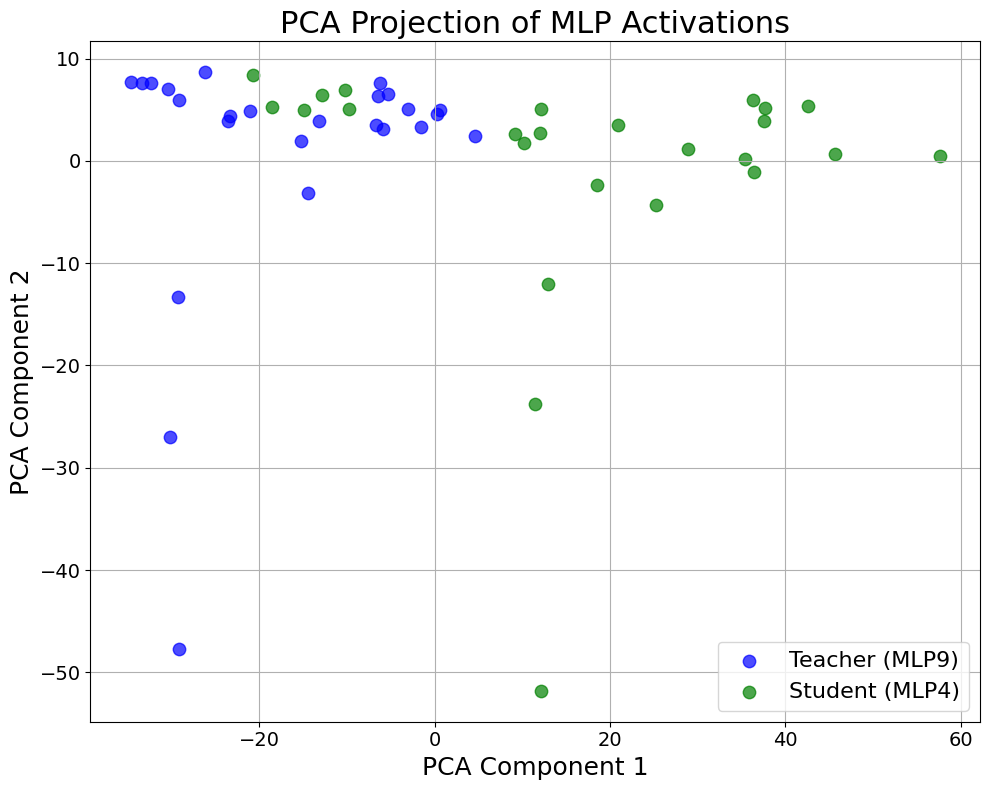

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

teacher_pca, student_pca = compare_mlps(9, 4, display=False)

plt.figure(figsize=(10, 8))

plt.scatter(teacher_pca[:, 0], teacher_pca[:, 1], c='blue', s=80, alpha=0.7, label=f'Teacher (MLP{9})')
plt.scatter(student_pca[:, 0], student_pca[:, 1], c='green', s=80, alpha=0.7, label=f'Student (MLP{4})')

plt.title("PCA Projection of MLP Activations", fontsize=22)
plt.xlabel("PCA Component 1", fontsize=18)
plt.ylabel("PCA Component 2", fontsize=18)

plt.legend(fontsize=16, loc='lower right', bbox_to_anchor=(1, 0))
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


### MLPT10/MLPS4:

In [ ]:
compare_mlps(10, 4)

Mean cosine similarity of other token activations: 0.6965
Cosine similarity of first token activations: 0.4615
(25, 768)
[[-7.69697502e-02  5.35529368e-02 -3.07150513e-01  6.83903694e-03
  -1.21628970e-01 -3.68634909e-02  4.15703803e-01  3.84507179e-02
   1.59345537e-01  1.52966589e-01  3.03297639e-02 -1.28535926e-01
  -8.45797807e-02  1.93951845e-01 -3.62093866e-01 -1.46957278e-01
  -1.25656366e-01  5.78278899e-02  2.98613042e-01 -2.00762212e-01
  -3.26865539e-02 -4.02230546e-02 -8.82157385e-02 -4.57134470e-02
  -6.76680803e-02  9.44864005e-02 -5.81323355e-02  1.12708971e-01
   6.36744350e-02  3.13067079e-01  3.96550447e-02  6.81069493e-03
  -2.40887389e-01 -4.72796559e-01 -1.17074504e-01 -2.09819064e-01
   1.56172168e+00  1.10515177e-01  2.76022673e-01  1.05335480e-02
  -1.33965880e-01 -3.73632014e-02  1.89191788e-01 -1.24221846e-01
  -1.49618059e-01 -3.40485215e-01  3.30213457e-03  1.99608684e-01
  -1.64201260e-01 -2.67107487e-02 -4.35501337e-03 -7.11481422e-02
  -2.68733919e-01 -7.

### MLPT10/MLPS5:

In [ ]:
compare_mlps(10, 5)

Mean cosine similarity of other token activations: 0.3141
Cosine similarity of first token activations: 0.4936
(25, 768)
[[-7.69697502e-02  5.35529368e-02 -3.07150513e-01  6.83903694e-03
  -1.21628970e-01 -3.68634909e-02  4.15703803e-01  3.84507179e-02
   1.59345537e-01  1.52966589e-01  3.03297639e-02 -1.28535926e-01
  -8.45797807e-02  1.93951845e-01 -3.62093866e-01 -1.46957278e-01
  -1.25656366e-01  5.78278899e-02  2.98613042e-01 -2.00762212e-01
  -3.26865539e-02 -4.02230546e-02 -8.82157385e-02 -4.57134470e-02
  -6.76680803e-02  9.44864005e-02 -5.81323355e-02  1.12708971e-01
   6.36744350e-02  3.13067079e-01  3.96550447e-02  6.81069493e-03
  -2.40887389e-01 -4.72796559e-01 -1.17074504e-01 -2.09819064e-01
   1.56172168e+00  1.10515177e-01  2.76022673e-01  1.05335480e-02
  -1.33965880e-01 -3.73632014e-02  1.89191788e-01 -1.24221846e-01
  -1.49618059e-01 -3.40485215e-01  3.30213457e-03  1.99608684e-01
  -1.64201260e-01 -2.67107487e-02 -4.35501337e-03 -7.11481422e-02
  -2.68733919e-01 -7.

### MLPT11/MLPS5:

In [ ]:
compare_mlps(11, 5)

Mean cosine similarity of other token activations: 0.7206
Cosine similarity of first token activations: -0.3017
(25, 768)
[[ 1.25841290e-01  9.92782831e-01 -1.01134133e+00  1.98192811e+00
  -5.09323597e-01 -7.41539001e-02  6.82851219e+00  3.43550324e-01
  -6.23930655e-02 -5.04983544e-01  1.50896478e+00 -1.35106742e-01
   1.82015419e-01  1.45768416e+00 -3.22306842e-01  4.15268898e-01
   6.81265652e-01 -2.57392466e-01  6.49740756e-01 -3.86085868e-01
   3.12815279e-01 -1.10260144e-01 -2.99166560e-01  1.01086271e+00
  -1.04144716e+00  7.22052753e-01 -3.63837510e-01 -9.14174795e-01
   5.70847332e-01 -5.91442943e-01  6.18069395e-02 -2.17958570e-01
  -3.00316274e-01 -8.88956785e-01 -4.42121893e-01  4.50667143e-01
  -3.05097961e+00  1.31686258e+00  1.38719952e+00  1.09514698e-01
   1.03208828e+00  1.40728518e-01 -5.93431711e-01 -1.09047568e+00
   1.81258425e-01 -2.00048104e-01 -1.88054323e-01  4.10541177e-01
  -2.16980174e-01 -9.59618807e-01  2.72255763e-03  2.10508418e+00
  -8.49999845e-01 -5

In [ ]:
# import numpy as np
# import plotly.graph_objects as go
# from sklearn.manifold import TSNE
# from sklearn.metrics.pairwise import cosine_similarity

# # Load activations
# mlp_11_acts = local_cache1['blocks.11.hook_mlp_out']
# mlp_11_np = np.array(mlp_11_acts)

# mlp_5_acts = local_cache2['blocks.5.hook_mlp_out']
# mlp_5_np = np.array(mlp_5_acts)

# # Prepare data for t-SNE
# mlp_11_reshaped = mlp_11_np.reshape(-1, mlp_11_np.shape[-1])
# mlp_5_reshaped = mlp_5_np.reshape(-1, mlp_5_np.shape[-1])

# # Compute cosine similarity for the first token activation
# first_token_sim = cosine_similarity(
#     mlp_11_np[0].reshape(1, -1),
#     mlp_5_np[0].reshape(1, -1)
# )[0, 0]
# print(f"Cosine similarity of first token activations: {first_token_sim:.4f}")

# # Perform t-SNE on combined data to ensure comparable embedding space
# combined_data = np.vstack((mlp_11_reshaped, mlp_5_reshaped))
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# combined_tsne = tsne.fit_transform(combined_data)

# # Split the results back
# teacher_tsne = combined_tsne[:len(mlp_11_reshaped)]
# student_tsne = combined_tsne[len(mlp_11_reshaped):]

# # Note: We can't directly compute similarity between t-SNE components like with PCA
# # since t-SNE doesn't have explicit components like PCA does
# print("Note: t-SNE doesn't have explicit components like PCA, so component similarity isn't applicable")

# # Visualization
# fig = go.Figure()

# fig.add_trace(go.Scatter(
#     x=teacher_tsne[:, 0],
#     y=teacher_tsne[:, 1],
#     mode='markers+text',
#     text=[str(i) for i in range(len(teacher_tsne))],
#     textposition="top center",
#     marker=dict(color='blue', size=8, opacity=0.7),
#     name='Teacher (MLP11)'
# ))

# fig.add_trace(go.Scatter(
#     x=student_tsne[:, 0],
#     y=student_tsne[:, 1],
#     mode='markers+text',
#     text=[str(i) for i in range(len(student_tsne))],
#     textposition="top center",
#     marker=dict(color='green', size=8, opacity=0.7),
#     name='Student (MLP5)'
# ))

# fig.update_layout(
#     title="t-SNE Projection of MLP Activations",
#     xaxis_title="t-SNE Component 1",
#     yaxis_title="t-SNE Component 2",
#     font=dict(size=16),
#     hovermode="closest",
#     template="plotly_white"
# )

# fig.show()

Mean cosine similarity of other token activations: 0.7206
Cosine similarity of first token activations: -0.3017
(25, 768)
[[ 1.25841290e-01  9.92782831e-01 -1.01134133e+00  1.98192811e+00
  -5.09323597e-01 -7.41539001e-02  6.82851219e+00  3.43550324e-01
  -6.23930655e-02 -5.04983544e-01  1.50896478e+00 -1.35106742e-01
   1.82015419e-01  1.45768416e+00 -3.22306842e-01  4.15268898e-01
   6.81265652e-01 -2.57392466e-01  6.49740756e-01 -3.86085868e-01
   3.12815279e-01 -1.10260144e-01 -2.99166560e-01  1.01086271e+00
  -1.04144716e+00  7.22052753e-01 -3.63837510e-01 -9.14174795e-01
   5.70847332e-01 -5.91442943e-01  6.18069395e-02 -2.17958570e-01
  -3.00316274e-01 -8.88956785e-01 -4.42121893e-01  4.50667143e-01
  -3.05097961e+00  1.31686258e+00  1.38719952e+00  1.09514698e-01
   1.03208828e+00  1.40728518e-01 -5.93431711e-01 -1.09047568e+00
   1.81258425e-01 -2.00048104e-01 -1.88054323e-01  4.10541177e-01
  -2.16980174e-01 -9.59618807e-01  2.72255763e-03  2.10508418e+00
  -8.49999845e-01 -5

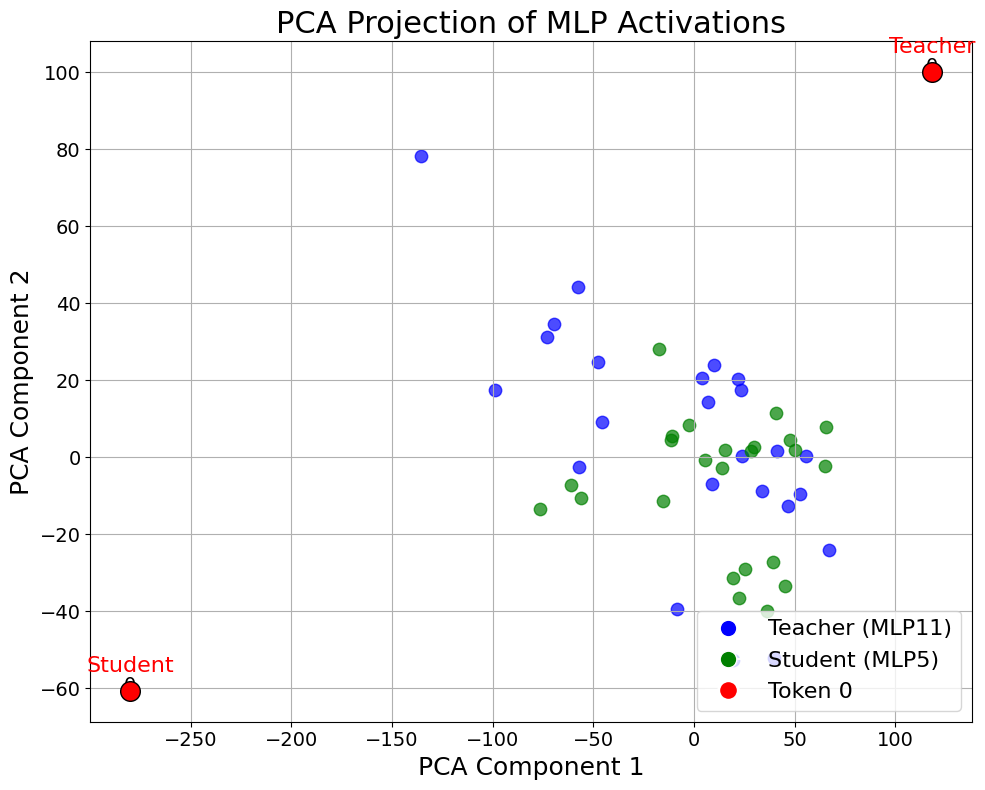

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.lines import Line2D

teacher_pca, student_pca = compare_mlps(11, 5, display=False)

plt.figure(figsize=(10, 8))

plt.scatter(teacher_pca[:, 0], teacher_pca[:, 1], c='blue', s=80, alpha=0.7, label=f'Teacher (MLP{11})')
for i in range(0, len(teacher_pca), 100):
    plt.text(teacher_pca[i, 0], teacher_pca[i, 1], str(i), fontsize=14, color='black', ha='center')  # Bigger fontsize

plt.scatter(student_pca[:, 0], student_pca[:, 1], c='green', s=80, alpha=0.7, label=f'Student (MLP{5})')
for i in range(0, len(student_pca), 100):
    plt.text(student_pca[i, 0], student_pca[i, 1], str(i), fontsize=14, color='black', ha='center')  # Bigger fontsize

plt.scatter(teacher_pca[0, 0], teacher_pca[0, 1], c='red', s=200, label='Token 0', edgecolors='black', zorder=5)
plt.scatter(student_pca[0, 0], student_pca[0, 1], c='red', s=200, edgecolors='black', zorder=5)

plt.text(teacher_pca[0, 0], teacher_pca[0, 1] + 5, "Teacher", fontsize=16, color='red', ha='center')  # Bigger fontsize
plt.text(student_pca[0, 0], student_pca[0, 1] + 5, "Student", fontsize=16, color='red', ha='center')  # Bigger fontsize

plt.title("PCA Projection of MLP Activations", fontsize=22)  # Bigger title
plt.xlabel("PCA Component 1", fontsize=18)  # Bigger axis label
plt.ylabel("PCA Component 2", fontsize=18)  # Bigger axis label
plt.legend(fontsize=16)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)  # Bigger tick labels

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=12, label=f'Teacher (MLP{11})'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=12, label=f'Student (MLP{5})'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=14, label='Token 0', markeredgewidth=2)
]
plt.legend(handles=legend_elements, fontsize=16, loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()


# Make cool plots

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

mlp_teacher_layers = [7, 8, 9, 10, 11]
mlp_student_layers = [3, 4, 5]

results = []

for teacher_layer in mlp_teacher_layers:
    for student_layer in mlp_student_layers:
      teacher_acts = np.array(local_cache1[f'blocks.{teacher_layer}.hook_mlp_out']).squeeze(0)
      student_acts = np.array(local_cache2[f'blocks.{student_layer}.hook_mlp_out']).squeeze(0)

      num_tokens = min(teacher_acts.shape[0], student_acts.shape[0])

      mean_all_tokens = np.mean([
          cosine_similarity(teacher_acts[i].reshape(1, -1), student_acts[i].reshape(1, -1))[0, 0]
          for i in range(0, num_tokens)
      ])

      results.append({
          'Teacher MLP': teacher_layer,
          'Student MLP': student_layer,
          'Mean Cosine Similarity': mean_all_tokens
      })

import pandas as pd
df = pd.DataFrame(results)



In [ ]:
fig = px.line(df, x='Teacher MLP', y='Mean Cosine Similarity',
              color='Student MLP', hover_data=['Mean Cosine Similarity'],
              title='Activation Cosine Similarity Between Teacher and Student MLPs')

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=df['Teacher MLP'].min(),
        dtick=1
    )
)

fig.show()


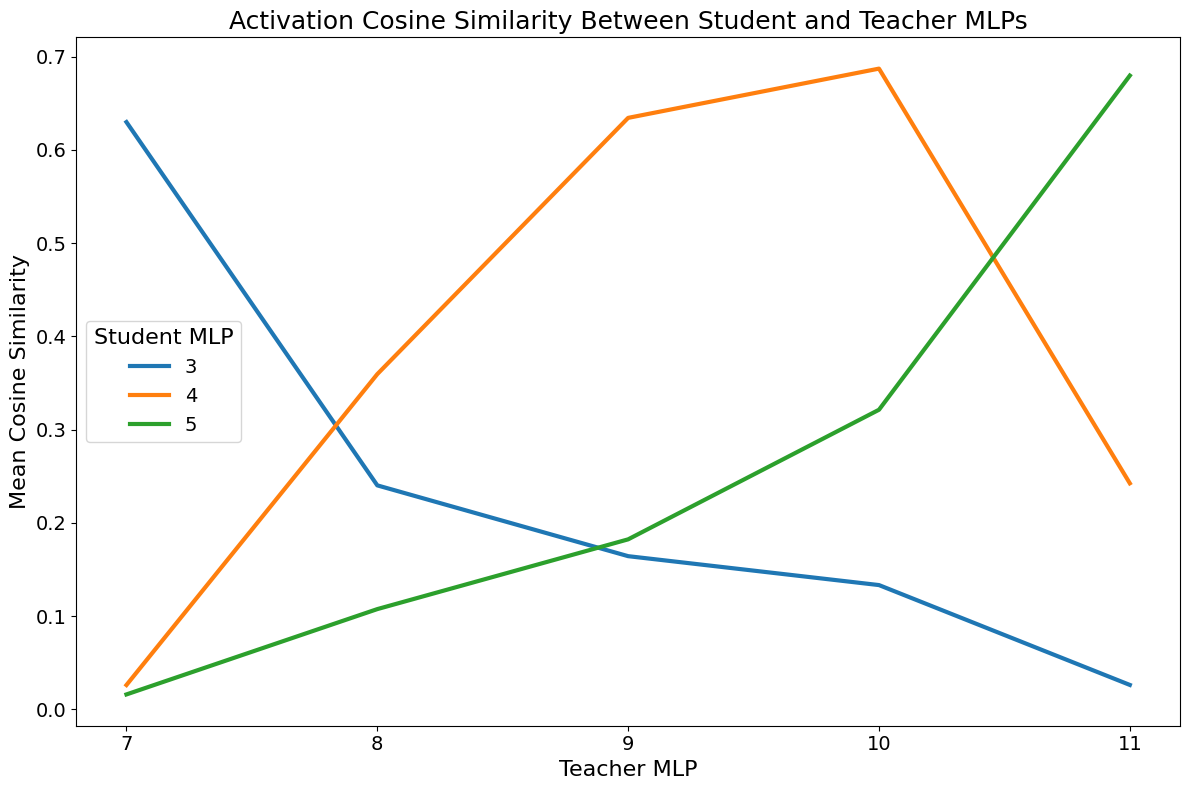

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
fig, ax = plt.subplots(figsize=(12, 8))  # Increase size for better visibility

# Plotting the data
for student_mlp in df['Student MLP'].unique():
    student_data = df[df['Student MLP'] == student_mlp]
    ax.plot(student_data['Teacher MLP'], student_data['Mean Cosine Similarity'], label=student_mlp, linewidth=3)

# Customizing labels and title
ax.set_xlabel('Teacher MLP', fontsize=16)
ax.set_ylabel('Mean Cosine Similarity', fontsize=16)
ax.set_title('Activation Cosine Similarity Between Student and Teacher MLPs', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

ax.set_xticks(np.arange(df['Teacher MLP'].min(), df['Teacher MLP'].max() + 1, 1))

# Adding a legend
ax.legend(title='Student MLP', fontsize=14, title_fontsize=16)

# Displaying the plot
plt.tight_layout()  # Ensures no clipping of content
plt.show()


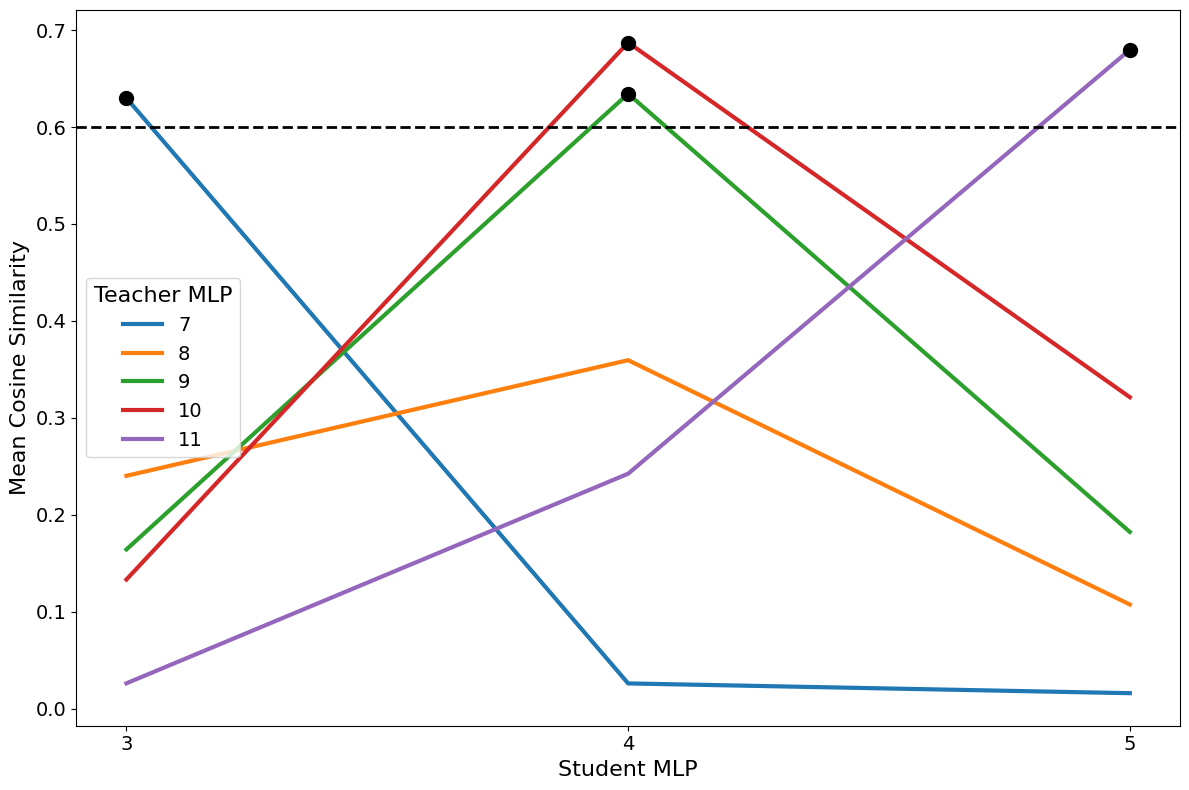

In [ ]:
# fig = px.line(df, x='Student MLP', y='Mean Cosine Similarity',
#               color='Teacher MLP', hover_data=['Mean Cosine Similarity'],
#               title='Activation Cosine Similarity Between Teacher and Student MLPs')

# fig.update_layout(
#     xaxis=dict(
#         tickmode='linear',
#         tick0=df['Student MLP'].min(),
#         dtick=1
#     )
# )

# fig.show()

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
fig, ax = plt.subplots(figsize=(12, 8))  # Increase size for better visibility

# Plotting the data
for teacher_mlp in df['Teacher MLP'].unique():
    teacher_data = df[df['Teacher MLP'] == teacher_mlp]
    ax.plot(teacher_data['Student MLP'], teacher_data['Mean Cosine Similarity'], label=teacher_mlp, linewidth=3)

    above_0_6 = teacher_data[teacher_data['Mean Cosine Similarity'] > 0.6]
    ax.scatter(above_0_6['Student MLP'], above_0_6['Mean Cosine Similarity'], color='black', zorder=5, s=100, label='')

ax.axhline(y=0.6, color='black', linestyle='--', linewidth=2)

# Customizing labels and title
ax.set_xlabel('Student MLP', fontsize=16)
ax.set_ylabel('Mean Cosine Similarity', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

ax.set_xticks(np.arange(df['Student MLP'].min(), df['Student MLP'].max() + 1, 1))

# Adding a legend
ax.legend(title='Teacher MLP', fontsize=14, title_fontsize=16,
          loc='center left')

# Displaying the plot
plt.tight_layout()  # Ensures no clipping of content
plt.show()



In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


mlp_teacher_layers = [7, 8, 9, 10, 11]
mlp_student_layers = [3, 4, 5]

results = []

for teacher_layer in mlp_teacher_layers:
    for student_layer in mlp_student_layers:
        mlp_teacher_acts = np.array(local_cache1[f'blocks.{teacher_layer}.hook_mlp_out'])
        mlp_student_acts = np.array(local_cache2[f'blocks.{student_layer}.hook_mlp_out'])

        average_sim_other_tokens = np.mean([
          cosine_similarity(mlp_teacher_acts[0, i].reshape(1, -1), mlp_student_acts[0, i].reshape(1, -1))[0, 0]
          for i in range(1, min(mlp_teacher_acts.shape[1], mlp_student_acts.shape[1]))
        ])

        first_token_sim = cosine_similarity(
            mlp_teacher_acts[0].reshape(1, -1),
            mlp_student_acts[0].reshape(1, -1)
        )[0, 0]

        curr_diff = abs(average_sim_other_tokens - first_token_sim)


        results.append({
            'Teacher MLP': teacher_layer,
            'Student MLP': student_layer,
            'diff': curr_diff
        })

df = pd.DataFrame(results)

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

mlp_teacher_layers = [7, 8, 9, 10, 11]
mlp_student_layers = [3, 4, 5]

results = []

for teacher_layer in mlp_teacher_layers:
    for student_layer in mlp_student_layers:
        teacher_acts = np.array(local_cache1[f'blocks.{teacher_layer}.hook_mlp_out']).squeeze(0)
        student_acts = np.array(local_cache2[f'blocks.{student_layer}.hook_mlp_out']).squeeze(0)

        num_tokens = min(teacher_acts.shape[0], student_acts.shape[0])

        average_sim_other_tokens = np.mean([
          cosine_similarity(teacher_acts[i].reshape(1, -1), student_acts[i].reshape(1, -1))[0, 0]
          for i in range(1, num_tokens)
        ])

        first_token_sim = cosine_similarity(
            teacher_acts[0].reshape(1, -1),
            student_acts[0].reshape(1, -1)
        )[0, 0]

        curr_diff = abs(average_sim_other_tokens - first_token_sim)


        results.append({
            'Teacher MLP': teacher_layer,
            'Student MLP': student_layer,
            'diff': curr_diff
        })

df = pd.DataFrame(results)

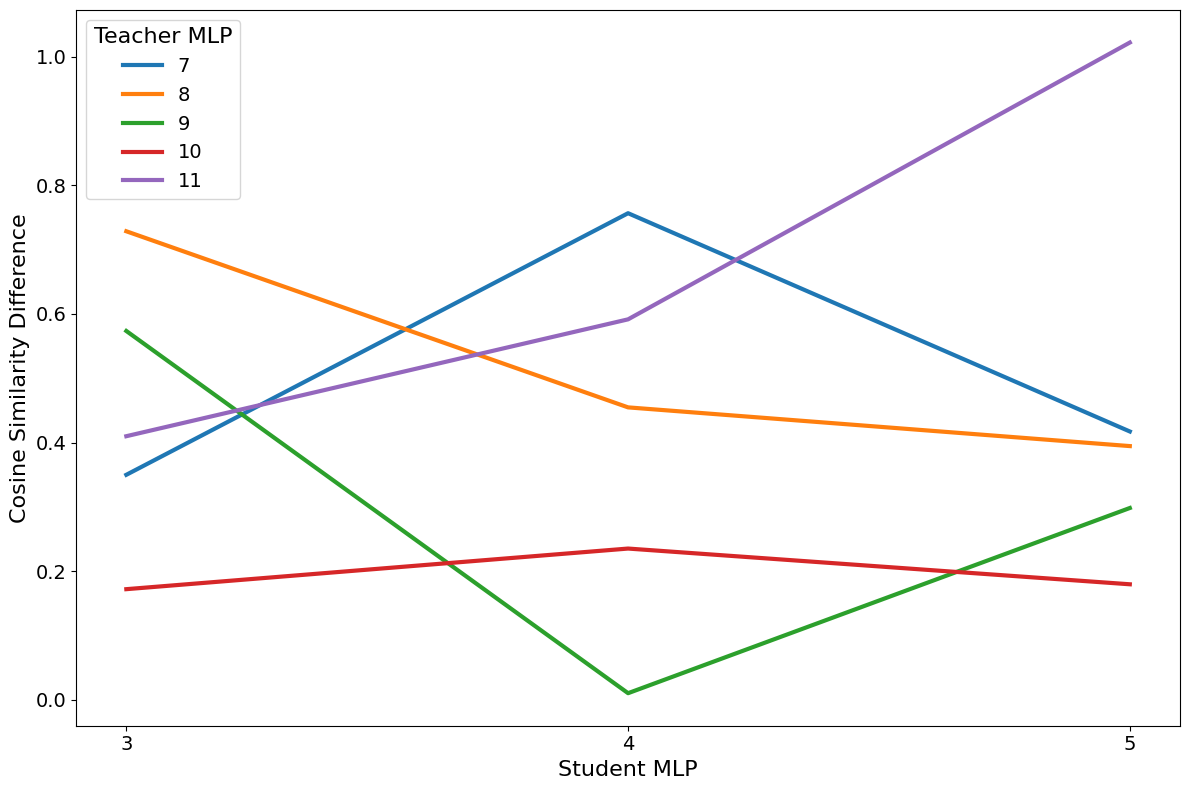

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

for teacher_mlp in df['Teacher MLP'].unique():
    teacher_data = df[df['Teacher MLP'] == teacher_mlp]
    ax.plot(teacher_data['Student MLP'], teacher_data['diff'], label=teacher_mlp, linewidth=3)

ax.set_xlabel('Student MLP', fontsize=16)
ax.set_ylabel('Cosine Similarity Difference', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

ax.set_xticks(np.arange(df['Student MLP'].min(), df['Student MLP'].max() + 1, 1))

ax.legend(title='Teacher MLP', fontsize=14, title_fontsize=16,
          loc='best')

plt.tight_layout()
plt.show()

# Average cosine sim early vs. late



In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


mlp_teacher_early = [0, 1, 2, 3, 4, 5, 6]
mlp_teacher_late = [7, 8, 9, 10, 11]

mlp_student_early = [0, 1, 2]
mlp_student_late = [3, 4, 5]

results_early = []
results_late = []

for teacher_layer in mlp_teacher_early:
    for student_layer in mlp_student_early:
        mlp_teacher_acts = np.array(local_cache1[f'blocks.{teacher_layer}.hook_mlp_out'])
        mlp_student_acts = np.array(local_cache2[f'blocks.{student_layer}.hook_mlp_out'])

        mean_all_tokens = np.mean([
            cosine_similarity(mlp_teacher_acts[0, i].reshape(1, -1), mlp_student_acts[0, i].reshape(1, -1))[0, 0]
            for i in range(0, min(mlp_teacher_acts.shape[1], mlp_student_acts.shape[1]))
        ])

        results_early.append({
            'Teacher MLP': teacher_layer,
            'Student MLP': student_layer,
            'Mean Cosine Similarity': mean_all_tokens
        })

import pandas as pd
df_early = pd.DataFrame(results_early)

for teacher_layer in mlp_teacher_late:
    for student_layer in mlp_student_late:
        mlp_teacher_acts = np.array(local_cache1[f'blocks.{teacher_layer}.hook_mlp_out'])
        mlp_student_acts = np.array(local_cache2[f'blocks.{student_layer}.hook_mlp_out'])

        mean_all_tokens = np.mean([
            cosine_similarity(mlp_teacher_acts[0, i].reshape(1, -1), mlp_student_acts[0, i].reshape(1, -1))[0, 0]
            for i in range(0, min(mlp_teacher_acts.shape[1], mlp_student_acts.shape[1]))
        ])

        results_late.append({
            'Teacher MLP': teacher_layer,
            'Student MLP': student_layer,
            'Mean Cosine Similarity': mean_all_tokens
        })

import pandas as pd
df_late = pd.DataFrame(results_late)

In [ ]:
np.mean(df_early)

1.4052061542040772

In [ ]:
np.mean(df_late)

4.4322201649761865

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


mlp_teacher_early = [1, 2, 3, 4, 5, 6]
mlp_teacher_late = [7, 8, 9, 10, 11]

results_early = []
results_late = []

for layer in mlp_teacher_early:
  for other_layer in mlp_teacher_early:
    if layer != other_layer:
      activation1 = np.array(local_cache1[f'blocks.{layer}.hook_mlp_out'])
      activation2 = np.array(local_cache1[f'blocks.{other_layer}.hook_mlp_out'])

      mean_all_tokens = np.mean([
        cosine_similarity(activation1[0, i].reshape(1, -1), activation2[0, i].reshape(1, -1))[0, 0]
        for i in range(0, min(activation1.shape[1], activation2.shape[1]))
      ])

      results_early.append(mean_all_tokens)

print(f"Average of early MLPs: {np.mean(results_early)}")

for layer in mlp_teacher_late:
  for other_layer in mlp_teacher_late:
    if layer != other_layer:
      activation1 = np.array(local_cache1[f'blocks.{layer}.hook_mlp_out'])
      activation2 = np.array(local_cache1[f'blocks.{other_layer}.hook_mlp_out'])

      mean_all_tokens = np.mean([
        cosine_similarity(activation1[0, i].reshape(1, -1), activation2[0, i].reshape(1, -1))[0, 0]
        for i in range(0, min(activation1.shape[1], activation2.shape[1]))
      ])

      results_late.append(mean_all_tokens)

print(f"Average of late MLPs: {np.mean(results_late)}")

Average of early MLPs: 0.08762286603450775
Average of late MLPs: 0.17636413872241974


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


mlp_student_early = [1, 2]
mlp_student_late = [3, 4, 5]

results_early = []
results_late = []

for layer in mlp_student_early:
  for other_layer in mlp_student_early:
    if layer != other_layer:
      activation1 = np.array(local_cache2[f'blocks.{layer}.hook_mlp_out'])
      activation2 = np.array(local_cache2[f'blocks.{other_layer}.hook_mlp_out'])

      mean_all_tokens = np.mean([
        cosine_similarity(activation1[0, i].reshape(1, -1), activation2[0, i].reshape(1, -1))[0, 0]
        for i in range(0, min(activation1.shape[1], activation2.shape[1]))
      ])

      results_early.append(mean_all_tokens)

print(f"Average of early MLPs: {np.mean(results_early)}")

for layer in mlp_student_late:
  for other_layer in mlp_student_late:
    if layer != other_layer:
      activation1 = np.array(local_cache2[f'blocks.{layer}.hook_mlp_out'])
      activation2 = np.array(local_cache2[f'blocks.{other_layer}.hook_mlp_out'])

      mean_all_tokens = np.mean([
        cosine_similarity(activation1[0, i].reshape(1, -1), activation2[0, i].reshape(1, -1))[0, 0]
        for i in range(0, min(activation1.shape[1], activation2.shape[1]))
      ])

      results_late.append(mean_all_tokens)

print(f"Average of late MLPs: {np.mean(results_late)}")

Average of early MLPs: 0.22678379714488983
Average of late MLPs: 0.16973590850830078
